In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from obspy.io.segy.segy import _read_segy
import matplotlib.ticker as ticker
from scipy.interpolate import griddata

In [32]:
dfs = pd.read_excel('GravPlot.xlsx', sheet_name=None)

# Access individual sheets
df1 = dfs['Group 5']
df2 = dfs['Group 1']

In [33]:
df_refract = pd.read_csv('2025-05-19-NSS.csv')

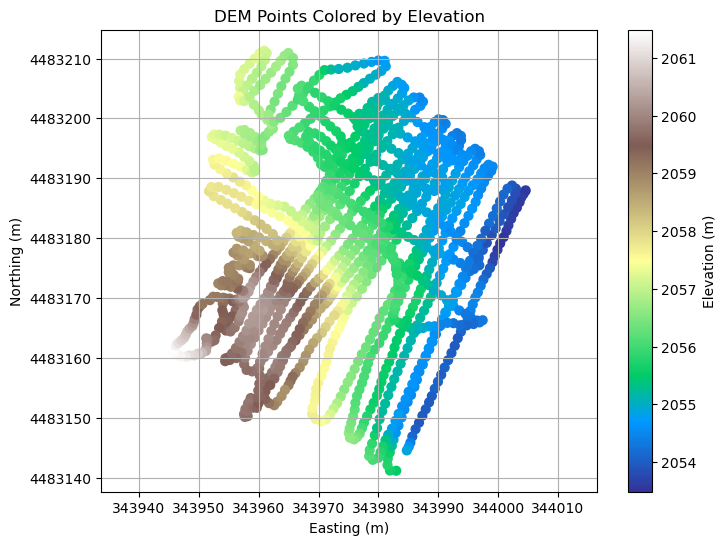

In [34]:
# Load your DEM data
df_dem = pd.read_csv("sulfur_cave_DEM_GPS_20220526.csv")

# Plot DEM points
plt.figure(figsize=(8, 6))
sc = plt.scatter(df_dem["Easting"], df_dem["Northing"], c=df_dem["Elevation"], cmap='terrain', s=40)
plt.colorbar(sc, label="Elevation (m)")

# Formatting
plt.xlabel("Easting (m)")
plt.ylabel("Northing (m)")
plt.title("DEM Points Colored by Elevation")
plt.grid(True)
plt.axis('equal')

# Show full number ticks
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{x:.0f}"))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f"{y:.0f}"))

plt.show()

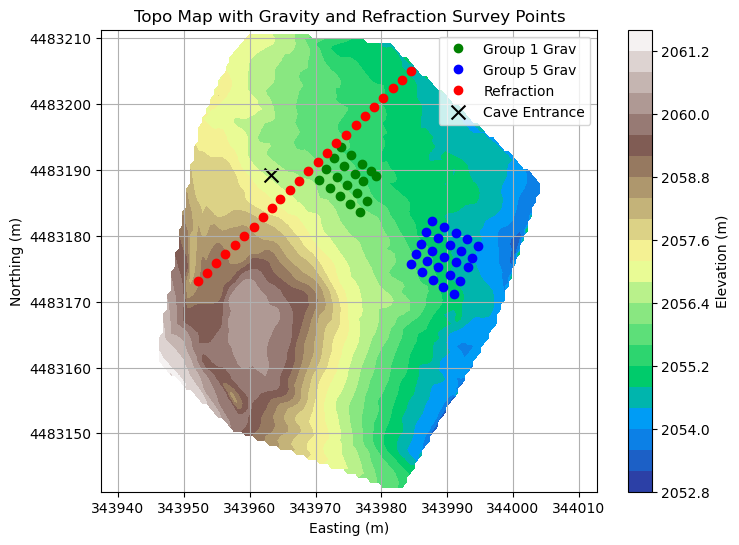

In [69]:
# Create a grid for interpolation
xi = np.linspace(df_dem["Easting"].min(), df_dem["Easting"].max(), 100)
yi = np.linspace(df_dem["Northing"].min(), df_dem["Northing"].max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolate elevation values onto the grid
zi = griddata(
    (df_dem["Easting"], df_dem["Northing"]),
    df_dem["Elevation"],
    (xi, yi),
    method='cubic'
)

# Plotting
plt.figure(figsize=(8, 6))

# Contour fill for elevation
contour = plt.contourf(xi, yi, zi, levels=20, cmap='terrain')
plt.colorbar(contour, label="Elevation (m)")

# Overlay gravity and refraction points
plt.plot(df2["Easting (m)"], df2["Northing (m)"], 'o', label="Group 1 Grav", color='green')
plt.plot(df1["Easting (m)"], df1["Northing (m)"], 'o', label="Group 5 Grav", color='blue')
plt.plot(df_refract["Easting"], df_refract["Northing"], 'o', label="Refraction", color='red')

# Cave entrance

plt.scatter(343963.25, 4483189.21, label="Cave Entrance", marker="x", color="k", s=100)

# Labels and formatting
plt.xlabel("Easting (m)")
plt.ylabel("Northing (m)")
plt.title("Topo Map with Gravity and Refraction Survey Points")
plt.grid(True)
plt.axis('equal')
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{x:.0f}"))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f"{y:.0f}"))
plt.legend()
plt.savefig("survey_pts")
plt.show()

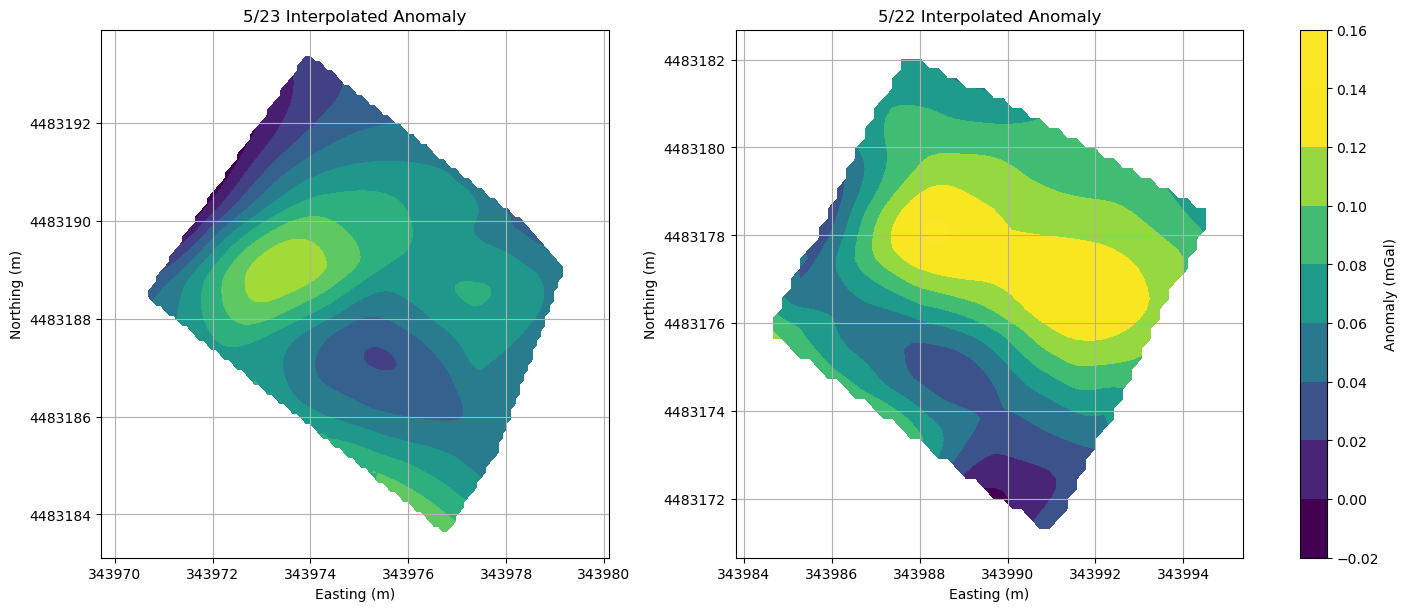

In [72]:
# Get global min and max for color scale
z_all = pd.concat([df1["new_anomaly (mGal)"], df2["new_anomaly (mGal)"]])
vmin = z_all.min()
vmax = z_all.max()

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6), constrained_layout=True)

# First plot: df2 (Group 1 goes on the left)
x2 = df2['Easting (m)']
y2 = df2['Northing (m)']
z2 = df2['new_anomaly (mGal)']
xi2 = np.linspace(x2.min(), x2.max(), 100)
yi2 = np.linspace(y2.min(), y2.max(), 100)
xi2, yi2 = np.meshgrid(xi2, yi2)
zi2 = griddata((x2, y2), z2, (xi2, yi2), method='cubic')

c1 = axs[0].contourf(xi2, yi2, zi2, levels=8, cmap='viridis', vmin=vmin, vmax=vmax)
axs[0].set_title("5/23 Interpolated Anomaly")
axs[0].set_xlabel("Easting (m)")
axs[0].set_ylabel("Northing (m)")
axs[0].axis('equal')
axs[0].grid(True)
axs[0].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{x:.0f}"))
axs[0].yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f"{y:.0f}"))

# Second plot: df1 (Group 5 goes on the right)
x1 = df1['Easting (m)']
y1 = df1['Northing (m)']
z1 = df1['new_anomaly (mGal)']
xi1 = np.linspace(x1.min(), x1.max(), 50)
yi1 = np.linspace(y1.min(), y1.max(), 50)
xi1, yi1 = np.meshgrid(xi1, yi1)
zi1 = griddata((x1, y1), z1, (xi1, yi1), method='cubic')

c2 = axs[1].contourf(xi1, yi1, zi1, levels=8, cmap='viridis', vmin=vmin, vmax=vmax)
axs[1].set_title("5/22 Interpolated Anomaly")
axs[1].set_xlabel("Easting (m)")
axs[1].set_ylabel("Northing (m)")
axs[1].axis('equal')
axs[1].grid(True)
axs[1].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{x:.0f}"))
axs[1].yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f"{y:.0f}"))

# Shared colorbar (using the second plot handle)
cbar = fig.colorbar(c2, ax=axs, location='right', label='Anomaly (mGal)')

plt.show()


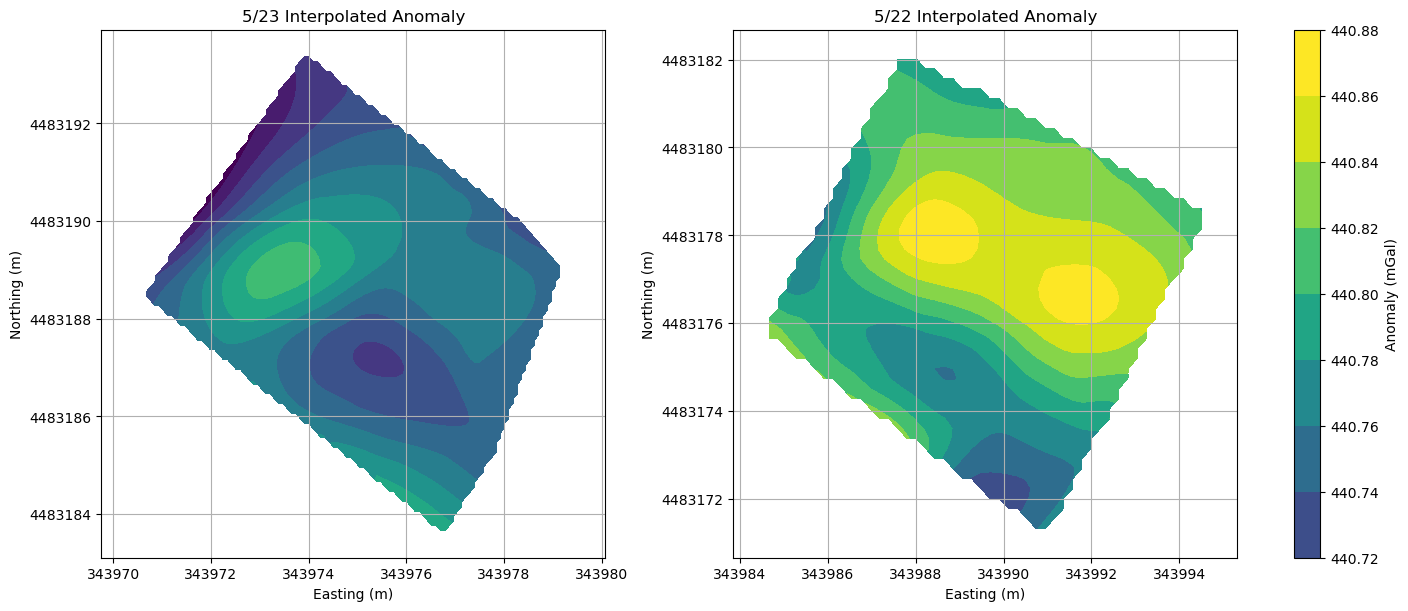

In [73]:
# Get global min and max for color scale
z_all = pd.concat([df1["Anomaly (mGal)"], df2["Anomaly (mGal)"]])
vmin = z_all.min()
vmax = z_all.max()

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6), constrained_layout=True)

# First plot: df2 (Group 1 goes on the left)
x2 = df2['Easting (m)']
y2 = df2['Northing (m)']
z2 = df2['Anomaly (mGal)']
xi2 = np.linspace(x2.min(), x2.max(), 100)
yi2 = np.linspace(y2.min(), y2.max(), 100)
xi2, yi2 = np.meshgrid(xi2, yi2)
zi2 = griddata((x2, y2), z2, (xi2, yi2), method='cubic')

c1 = axs[0].contourf(xi2, yi2, zi2, levels=8, cmap='viridis', vmin=vmin, vmax=vmax)
axs[0].set_title("5/23 Interpolated Anomaly")
axs[0].set_xlabel("Easting (m)")
axs[0].set_ylabel("Northing (m)")
axs[0].axis('equal')
axs[0].grid(True)
axs[0].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{x:.0f}"))
axs[0].yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f"{y:.0f}"))

# Second plot: df1 (Group 5 goes on the right)
x1 = df1['Easting (m)']
y1 = df1['Northing (m)']
z1 = df1['Anomaly (mGal)']
xi1 = np.linspace(x1.min(), x1.max(), 50)
yi1 = np.linspace(y1.min(), y1.max(), 50)
xi1, yi1 = np.meshgrid(xi1, yi1)
zi1 = griddata((x1, y1), z1, (xi1, yi1), method='cubic')

c2 = axs[1].contourf(xi1, yi1, zi1, levels=8, cmap='viridis', vmin=vmin, vmax=vmax)
axs[1].set_title("5/22 Interpolated Anomaly")
axs[1].set_xlabel("Easting (m)")
axs[1].set_ylabel("Northing (m)")
axs[1].axis('equal')
axs[1].grid(True)
axs[1].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{x:.0f}"))
axs[1].yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f"{y:.0f}"))

# Shared colorbar (using the second plot handle)
cbar = fig.colorbar(c2, ax=axs, location='right', label='Anomaly (mGal)')

plt.show()
